In [9]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
df = pd.read_csv("data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [27]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'target']
df[categorical_cols] = df[categorical_cols].astype('category')

In [29]:
df['exang'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [31]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.0 KB


In [35]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


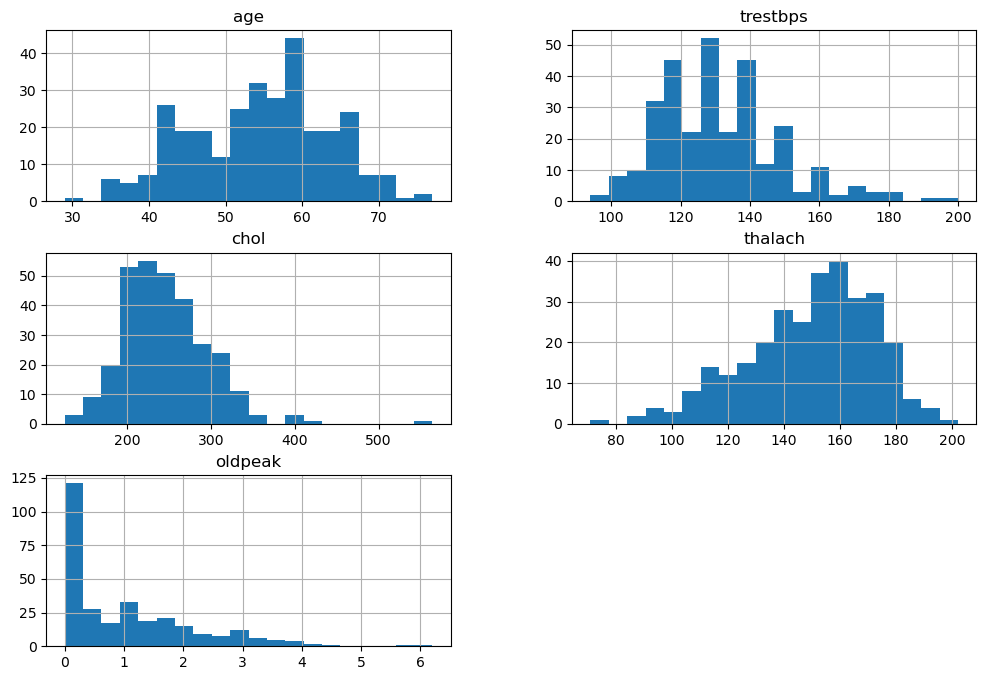

In [37]:
# Histogram

df.hist(figsize=(12,8), bins=20)  # Histogram
plt.show()

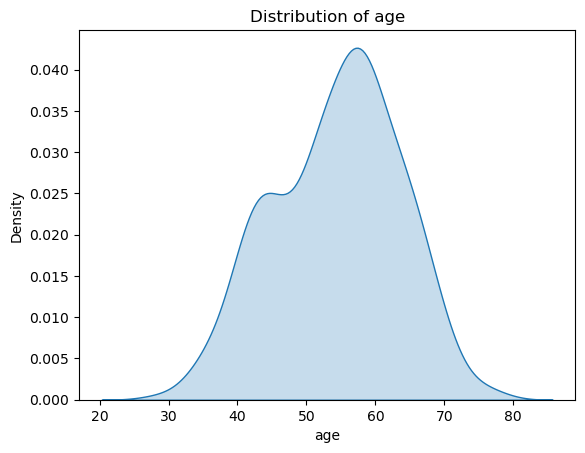

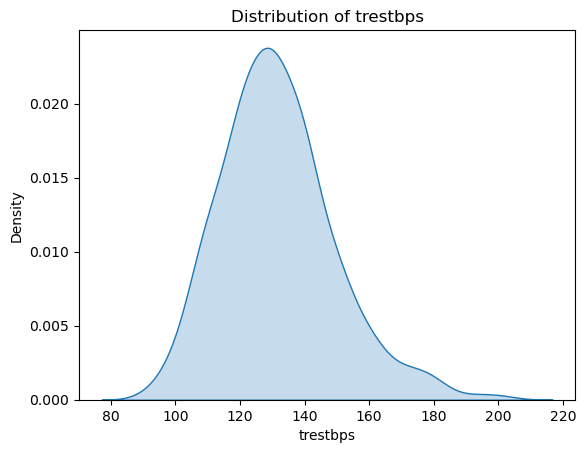

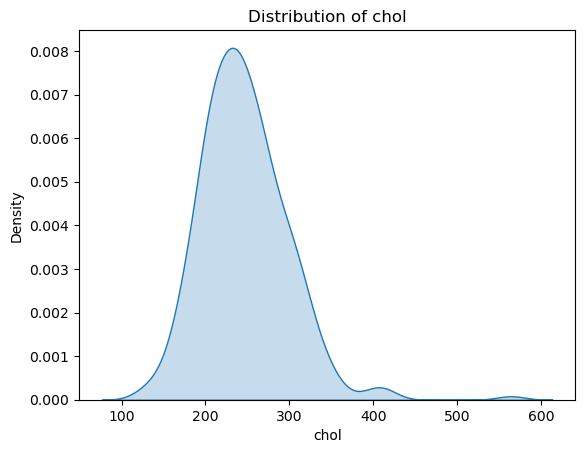

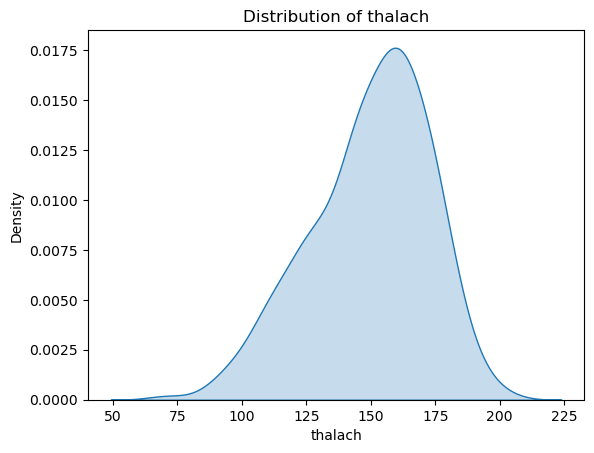

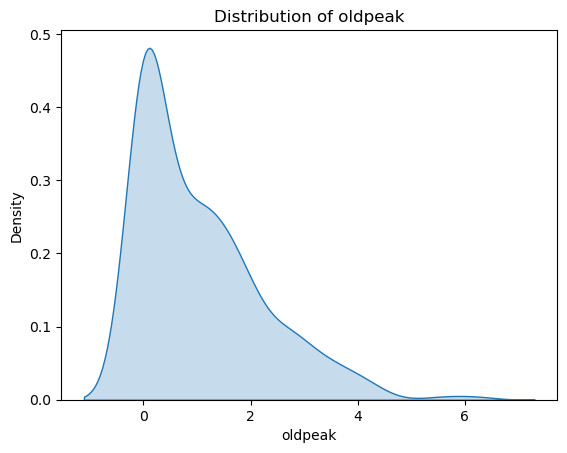

In [41]:
# OR KDE (density) plots
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Distribution of {col}')
    plt.show()

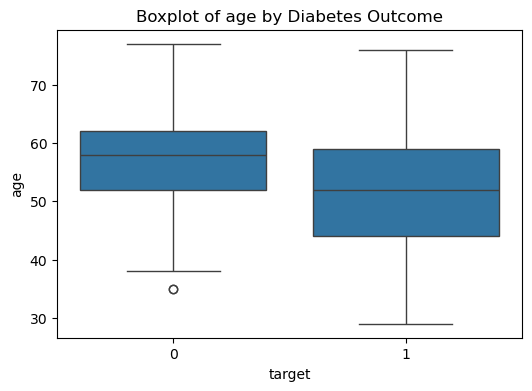

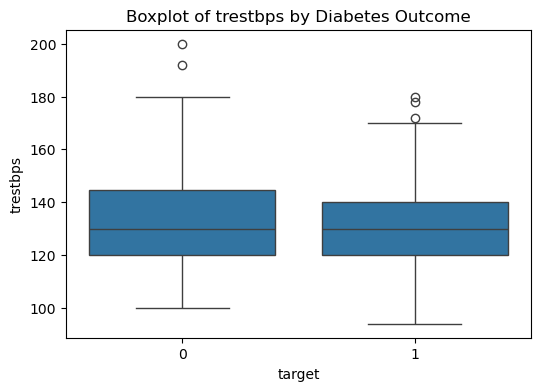

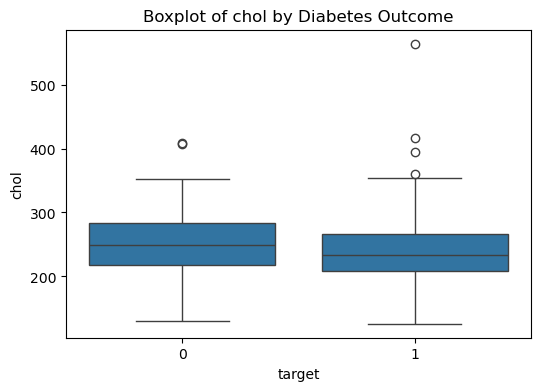

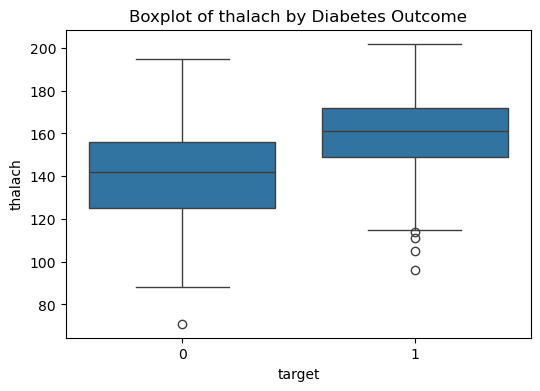

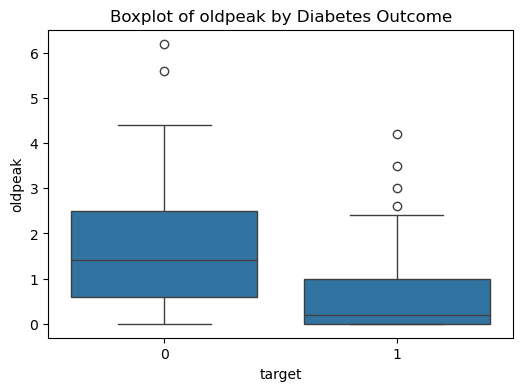

In [45]:
# Box Plots for outlieres

for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="target", y=col, data=df)
    plt.title(f"Boxplot of {col} by Diabetes Outcome")
    plt.show()

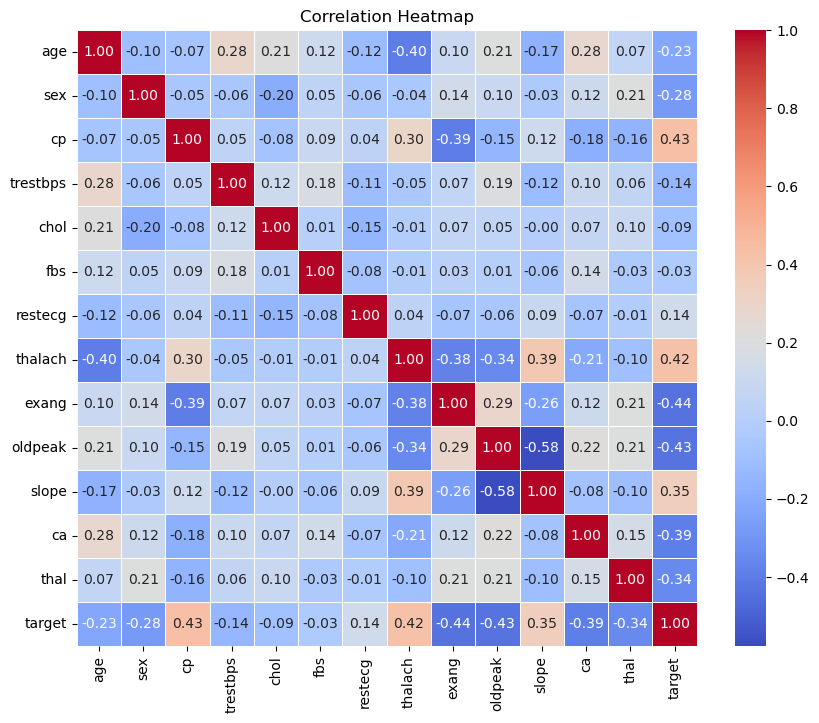

In [47]:
# Histogram

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [53]:
# Remove outliers for 'trestbps', 'chol', 'thalach', 'oldpeak'

df = df[(df['trestbps'] <= df['trestbps'].quantile(0.95))]  # Remove extreme trestbps
df = df[(df['chol'] <= df['chol'].quantile(0.95))]  # Remove extreme chol
df = df[(df['thalach'] <= df['thalach'].quantile(0.95))]  # Remove extreme thalach
df = df[(df['oldpeak'] <= df['oldpeak'].quantile(0.95))]  # Remove extreme oldpeak

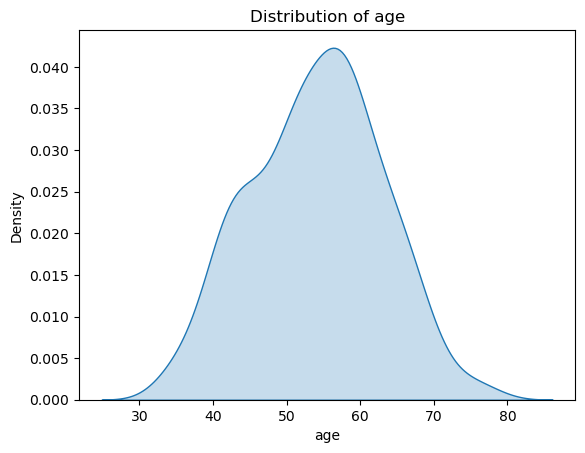

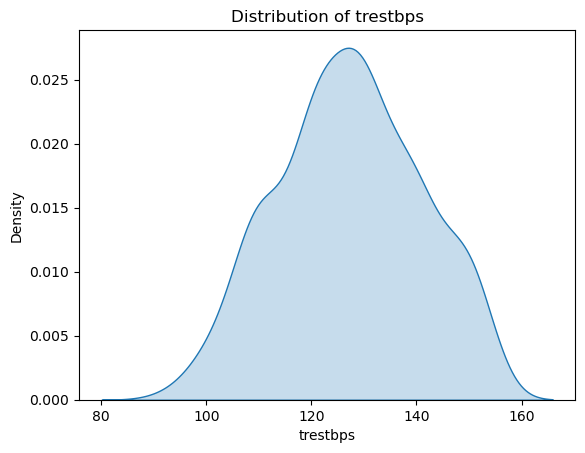

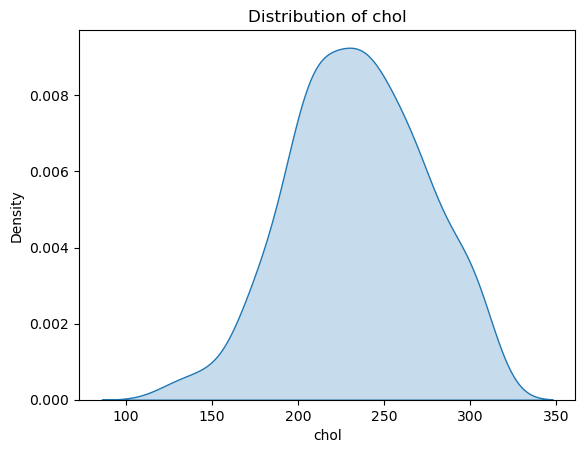

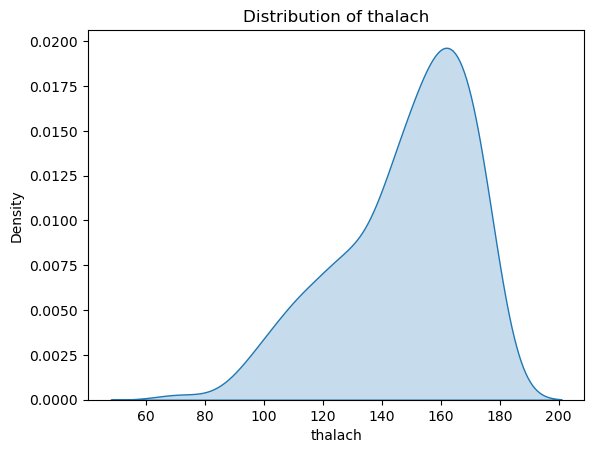

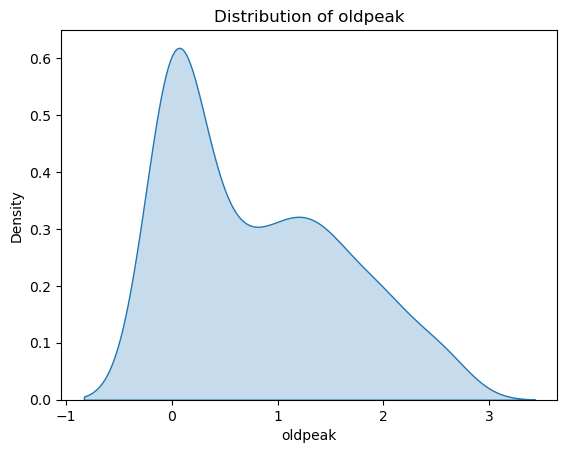

In [55]:
# OR KDE (density) plots
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       205 non-null    int64   
 1   sex       205 non-null    category
 2   cp        205 non-null    category
 3   trestbps  205 non-null    int64   
 4   chol      205 non-null    int64   
 5   fbs       205 non-null    category
 6   restecg   205 non-null    category
 7   thalach   205 non-null    int64   
 8   exang     205 non-null    category
 9   oldpeak   205 non-null    float64 
 10  slope     205 non-null    category
 11  ca        205 non-null    category
 12  thal      205 non-null    category
 13  target    205 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 12.8 KB


In [59]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,205.000000,205.000000,205.000000,205.000000,205.000000
mean,54.014634,127.331707,234.482927,147.736585,0.802927
std,8.829251,13.445869,38.585225,22.198721,0.803724
min,34.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,207.000000,132.000000,0.000000
50%,54.000000,128.000000,234.000000,152.000000,0.600000
75%,60.000000,138.000000,263.000000,165.000000,1.400000
max,77.000000,152.000000,308.000000,178.000000,2.600000


In [63]:
# Standard Scaler Normalization

scaler = StandardScaler()
featuresToScale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[featuresToScale] = scaler.fit_transform(df[featuresToScale])

df.describe()

,age,trestbps,chol,thalach,oldpeak
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,-8.665155e-17,2.615794e-16,3.279220e-16,-5.199093e-16,-2.599547e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-2.272405e+00,-2.485024e+00,-2.818397e+00,-3.465264e+00,-1.001454e+00
25%,-6.828844e-01,-5.466107e-01,-7.140092e-01,-7.106314e-01,-1.001454e+00
50%,-1.661519e-03,4.982412e-02,-1.254649e-02,1.925269e-01,-2.531014e-01
75%,6.795614e-01,7.953676e-01,7.408764e-01,7.795798e-01,7.447022e-01
max,2.609693e+00,1.839128e+00,1.909981e+00,1.366633e+00,2.241408e+00


In [69]:
df['target'].value_counts(normalize=True)

target
1    0.585366
0    0.414634
Name: proportion, dtype: float64

In [83]:
# Split the data

X = df.drop('target', axis=1)
Y = df['target']


In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(143, 13) (62, 13)
(143,) (62,)


In [87]:
# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate performance
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2%}")

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        25
           1       0.84      0.73      0.78        37

    accuracy                           0.76        62
   macro avg       0.76      0.76      0.75        62
weighted avg       0.77      0.76      0.76        62

[[20  5]
 [10 27]]
Accuracy: 75.81%


In [91]:
# SVM Model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


svm_model = SVC(kernel='linear', random_state=42)  # Linear kernel
svm_model.fit(X_train, Y_train)

Y_pred = svm_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Confusion Matrix
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_pred))

# Classification Report
print('Classification Report:\n', classification_report(Y_test, Y_pred))

Accuracy: 79.03%
Confusion Matrix:
 [[20  5]
 [ 8 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75        25
           1       0.85      0.78      0.82        37

    accuracy                           0.79        62
   macro avg       0.78      0.79      0.79        62
weighted avg       0.80      0.79      0.79        62

